导包

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

数据预处理: 去掉不用的特征,字符串转数字等

In [2]:
churn = pd.read_csv(r"C:\Users\tianx\PycharmProjects\analysistest\dataset\churn\churn.csv")

In [3]:
churn

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
churn.shape

(3333, 21)

In [5]:
churn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [6]:
churn_data = churn.drop(["State","Account Length", "Area Code","Phone"],axis=1)

In [7]:
churn_data.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
churn_data.loc[:,"Int'l Plan"] = churn_data.loc[:,"Int'l Plan"].map(dict(zip(churn_data.loc[:,"Int'l Plan"].unique(),range(len(churn_data.loc[:,"Int'l Plan"].unique())))))
churn_data

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,1,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,1,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,1,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,0,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,1,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,0,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,1,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [9]:
churn_data.loc[:,"VMail Plan"] = churn_data.loc[:,"VMail Plan"].map(dict(zip(churn_data.loc[:,"VMail Plan"].unique(),range(len(churn_data.loc[:,"VMail Plan"].unique())))))
churn_data

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,1,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,0,0,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,1,1,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,0,1,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,1,0,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [10]:
churn_data.loc[:,"Churn?"] = churn_data.loc[:,"Churn?"].map(dict(zip(churn_data.loc[:,"Churn?"].unique(),range(len(churn_data.loc[:,"Churn?"].unique())))))
churn_data

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,0,0,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,1,1,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,0,1,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,1,0,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


定义函数封装算法使用交叉验证的过程,函数返回为算法的预测结果

In [24]:
def cross_validation(estimators,X_train, y_train, X_test=None, threshold=0.5):
    if X_test is None: X_test=X_train
    y_predict = []
    if isinstance(estimators,list):
        for estimator in estimators:
            estimator.fit(X_train,y_train)
            y_ = estimator.predict_proba(X_test)[:,1]
            y_predict.append(y_)
        else:
            y_predict = np.array(y_predict).mean(axis=0)
            result = np.array([True if x > threshold else False for x in y_])
    else:
        estimators.fit(X_train,y_train)
        y_ = estimators.predict_proba(X_test)[:,1]
        result = np.array([True if x > threshold else False for x in y_])
    return result

选择3个算法,传入函数中,得到预测值, 并计算得分

In [12]:
X_train, X_test, y_train, y_test = train_test_split(churn_data.drop("Churn?",axis=1), churn_data.loc[:,"Churn?"])

In [25]:
estimators = [SVC(probability=True), LogisticRegression()]
y_predict = cross_validation(estimators,X_train, y_train, X_test=X_test,threshold=0.5)

In [26]:
y_predict

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [27]:
y_test

942     0
1032    0
1799    0
1028    0
1762    0
1201    0
2439    0
920     0
1458    0
3203    0
2268    0
1088    0
832     1
3159    0
2652    0
1850    1
2515    1
75      0
2042    0
1857    1
671     0
206     0
611     0
231     0
1854    0
2879    0
575     0
2961    1
60      0
2840    0
       ..
1202    0
1404    0
627     0
582     0
1626    0
3033    0
1057    0
2012    0
2893    0
719     0
2735    1
2433    0
1668    0
3127    1
2725    0
1089    0
1031    0
1192    1
1834    0
904     1
2635    0
2013    0
3264    0
983     0
3040    0
1184    0
2841    0
169     0
573     0
55      0
Name: Churn?, Length: 834, dtype: int64

In [28]:
score = sum(y_predict==y_test) / len(y_test)
score

0.8669064748201439

取不同的阈值,计算相应阈值下的召回率,精确率, 准确率. 并把阈值,预测正确的个数,召回率用DataFrame表格的形式展示出来.
在这个业务场景中,找到最合适的阈值.

In [29]:
result_df = pd.DataFrame(data=None, columns=["threshold","total_correct","Recall"])

In [37]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
total_correct = []
Recall = []
Precision = []
Accuracy = []
for threshold in thresholds:
    estimators = [SVC(probability=True), LogisticRegression(), GradientBoostingClassifier()]
    y_predict = cross_validation(estimators,X_train, y_train, X_test=X_test,threshold=threshold)
    correct = sum(y_predict==y_test)
    total_correct.append(correct)
    recall = sum(y_predict[y_test==True]) / sum(y_test==True)
    Recall.append(recall)
    precision = sum(y_test[y_predict==True]) / sum(y_predict==True)
    Precision.append(precision)
    accuracy = sum(y_predict==y_test) / len(y_test)
    Accuracy.append(accuracy)

In [38]:
data = np.array([thresholds,total_correct,Recall,Precision,Accuracy]).transpose()
columns = ["threshold","total_correct","Recall","Precision","Accuracy"]
result_df = pd.DataFrame(data=data, columns=columns)
result_df

,threshold,total_correct,Recall,Precision,Accuracy
0,0.1,745.0,0.827273,0.565217,0.893285
1,0.2,782.0,0.818182,0.737705,0.937650
2,0.3,793.0,0.800000,0.822430,0.950839
3,0.4,793.0,0.754545,0.855670,0.950839
4,0.5,795.0,0.718182,0.908046,0.953237
5,0.6,792.0,0.672727,0.925000,0.949640
6,0.7,789.0,0.618182,0.957746,0.946043
7,0.8,780.0,0.509091,1.000000,0.935252
8,0.9,762.0,0.345455,1.000000,0.913669


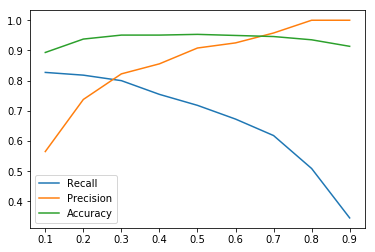

In [41]:
# plt.plot(result_df.loc[:,"threshold"],result_df.loc[:,"total_correct"])
plt.plot(result_df.loc[:,"threshold"],result_df.loc[:,"Recall"], label="Recall")
plt.plot(result_df.loc[:,"threshold"],result_df.loc[:,"Precision"], label="Precision")
plt.plot(result_df.loc[:,"threshold"],result_df.loc[:,"Accuracy"], label="Accuracy")
plt.legend()
plt.show()

# 最合适的阈值 0.7